---
# DNN : `spam` (avec `Keras`, version de base)
---

## Packages

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras import layers, models

---
## 1. Données
---

### 1.1. Importation

In [2]:
# En local :
directory = '/Users/vincentlefieux/Dropbox/Docs_ACADEMIQUE/Data/'

# Sur Google collab ou Onyxia (sur un répertoire temporaire) :
# directory = ''

# Sur Google collab (sur le drive) :
# from google.colab import drive
# drive.mount('/content/drive')
# directory = '/content/drive/MyDrive/Data/'

In [3]:
data = pd.read_csv(directory + 'spam.csv',
                   header    = 0,
                   # index_col = 0,
                   sep       = ',',
                   decimal   = '.')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [5]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### 1.2. Gestion des données manquantes

In [6]:
missing_percentage = data.isna().mean() * 100

print('MISSING VALUES :')
if missing_percentage[missing_percentage != 0].empty:
    print('No')
else:
    print(missing_percentage[missing_percentage != 0].sort_values(ascending=False))

MISSING VALUES :
No


### 1.3. Gestion des variables

In [7]:
target = 'spam'

y = data[target]
X = data.drop(target, axis=1)

### 1.4. Création des échantillons de validation et test

In [8]:
test_portion  = 1/5
valid_portion = 1/5

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=test_portion)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=valid_portion)

print('Dimensions de X_train :', X_train.shape)
print('Dimensions de X_valid :', X_valid.shape)
print('Dimensions de X_test  :', X_test.shape)

print('Dimensions de y_train :', y_train.shape)
print('Dimensions de y_valid :', y_valid.shape)
print('Dimensions de y_test  :', y_test.shape)

Dimensions de X_train : (2944, 57)
Dimensions de X_valid : (736, 57)
Dimensions de X_test  : (921, 57)
Dimensions de y_train : (2944,)
Dimensions de y_valid : (736,)
Dimensions de y_test  : (921,)


### 1.5. Normalisation des covariables

On normalise (centrage-réduction) les covariables :

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_valid_norm = scaler.transform(X_valid)
X_test_norm  = scaler.transform(X_test)

---
## 2. DNN
---

### 2.1. Architecture

In [10]:
dim_inputs  = (X_train_norm.shape[1],)
dim_outputs = 1

n_units_hl1 = 50
n_units_hl2 = 30

model = models.Sequential(name='DNN')

model.add(layers.Input(shape=dim_inputs, name='Inputs'))

model.add(layers.Dense(units=n_units_hl1, activation='relu', name='Hidden_layer_1'))

model.add(layers.Dense(units=n_units_hl2, activation='relu', name='Hidden_layer_2'))

model.add(layers.Dense(units=dim_outputs, activation='sigmoid', name='Output_layer'))

model.summary()

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_1 (Dense)      (None, 50)                2900      
                                                                 
 Hidden_layer_2 (Dense)      (None, 30)                1530      
                                                                 
 Output_layer (Dense)        (None, 1)                 31        
                                                                 
Total params: 4461 (17.43 KB)
Trainable params: 4461 (17.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 2.2. Optimiseur

In [11]:
model.compile(optimizer = 'adam',
              loss      = 'binary_crossentropy',
              metrics   = ['accuracy'])

### 2.3. Entraînement

In [12]:
hist = model.fit(X_train_norm,
                 y_train,
                 batch_size      = 500,
                 epochs          = 200,
                 validation_data = (X_valid_norm, y_valid),
                 verbose         = 1)

Epoch 1/200
6/6 [==============================] - 0s 23ms/step - loss: 0.7907 - accuracy: 0.3818 - val_loss: 0.7322 - val_accuracy: 0.4429
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6810 - accuracy: 0.5781 - val_loss: 0.6422 - val_accuracy: 0.6698
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6060 - accuracy: 0.7408 - val_loss: 0.5745 - val_accuracy: 0.7826
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 0.5427 - accuracy: 0.8064 - val_loss: 0.5161 - val_accuracy: 0.8329
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4862 - accuracy: 0.8332 - val_loss: 0.4629 - val_accuracy: 0.8573
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4355 - accuracy: 0.8471 - val_loss: 0.4143 - val_accuracy: 0.8668
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 0.3896 - accuracy: 0.8621 - val_loss: 0.3718 - val_accuracy: 0.8791
Epoch 8/200
6/6 [=========

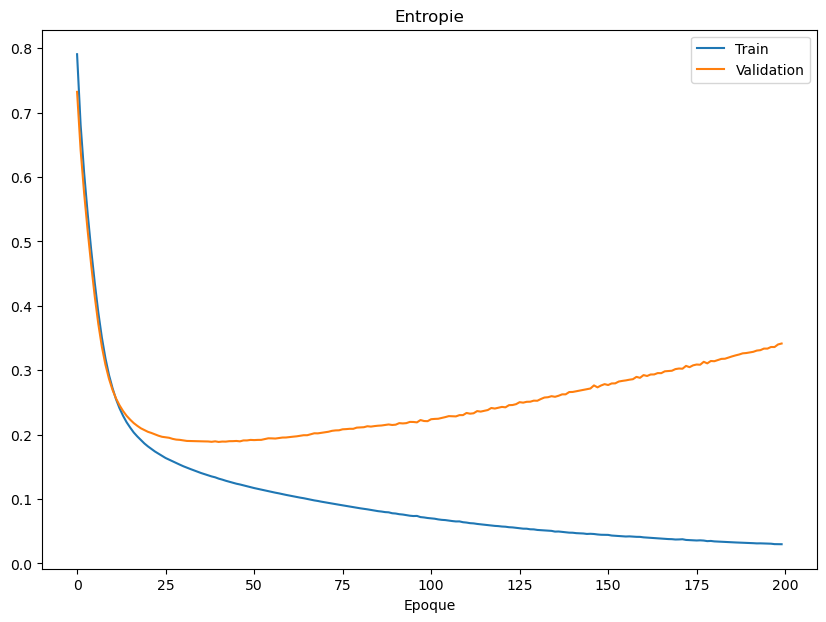

In [13]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(hist.history['loss'], label='Train')
ax.plot(hist.history['val_loss'], label='Validation')
ax.set_xlabel('Epoque')
ax.set_title('Entropie')
ax.legend(loc='best')
plt.show()

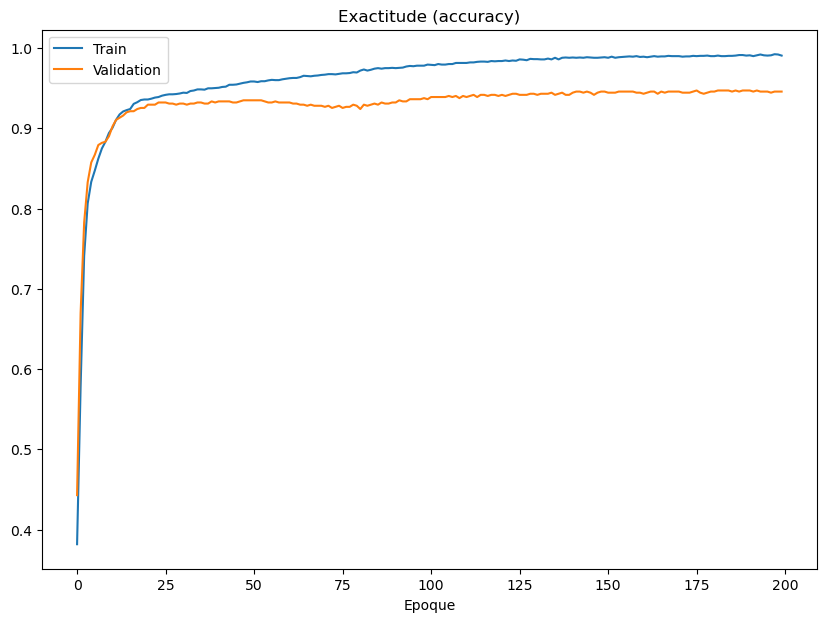

In [14]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(hist.history['accuracy'], label='Train')
ax.plot(hist.history['val_accuracy'], label='Validation')
ax.set_xlabel('Epoque')
ax.set_title('Exactitude (accuracy)')
ax.legend(loc='best')
plt.show()

### 2.4. Prévisions

In [15]:
y_test_pred = model.predict(X_test_norm)
y_test_pred[0:5]

29/29 [==============================] - 0s 495us/step


array([[3.0083235e-08],
       [9.9999791e-01],
       [8.3616003e-04],
       [6.8414705e-03],
       [1.5535491e-08]], dtype=float32)

In [16]:
y_test_pred_classes = (y_test_pred > 0.5).astype(int)
y_test_pred_classes[0:5]

array([[0],
       [1],
       [0],
       [0],
       [0]])

In [17]:
score_test = model.evaluate(X_test_norm, y_test, verbose=0)
print(f'Entropie test   : {score_test[0]:4.4f}')
print(f'Exactitude test : {score_test[1]:4.4f}')

Entropie test   : 0.3713
Exactitude test : 0.9359
